In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I will take the data from the site "setec.mk". Specifically, I will take the data about the name, code, regular price, club price, manufacturer and availability of graphics cards.

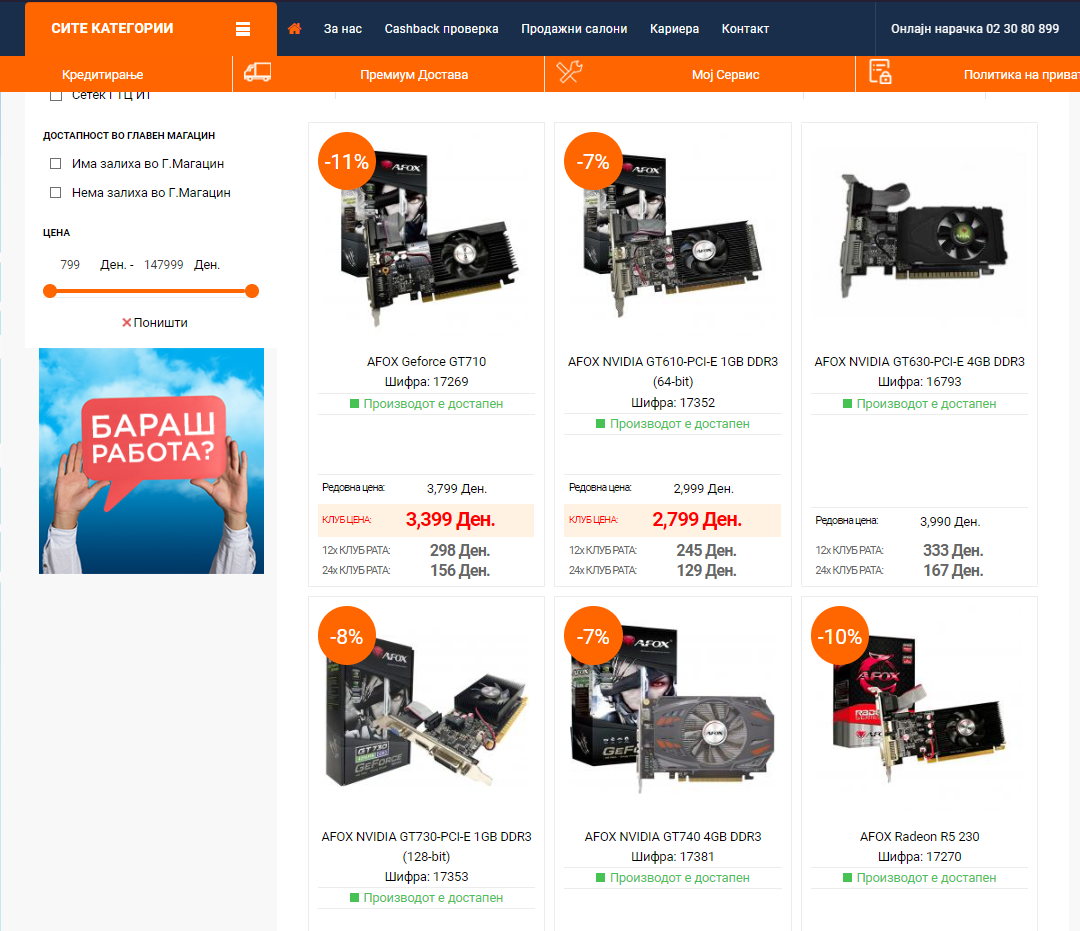

#Import libraries and modules

In [ ]:
import numpy as np
import pandas as pd
import requests

from bs4 import BeautifulSoup
from IPython.display import HTML

import warnings

requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")
type(HTML)

url = "https://setec.mk/index.php?route=product/category&path=10019_10020_10025&sort=p.sort_order&order=ASC&limit=100"


#Send Request and get Response

In [ ]:
response = requests.get(url)

In [ ]:
#should be 200 ok
response

<Response [200]>

#Parse the HTML using BeautifulSoup

In [ ]:
html = BeautifulSoup(response.text,"html.parser")
html

#Extracting data

## Selecting products

In [ ]:
product_row = html.select_one(".product-grid").select(".row")

card_names = []

for item in product_row:
  for item2 in item.select(".col-sm-4"):
    card_names.append(item2.select_one(".name").select_one("a").text.strip())

card_names


['AFOX AMD Radeon RX550 8GB GDDR5',
 'AFOX AMD Radeon RX5700XT 8GB GDDR6',
 'AFOX Geforce GT710',
 'AFOX Geforce GT730',
 'AFOX NVIDIA Geforce GTX1660TI',
 'AFOX NVIDIA GT610-PCI-E 1GB DDR3 (64-bit)',
 'AFOX NVIDIA GT630-PCI-E 4GB DDR3',
 'AFOX NVIDIA GT730-PCI-E 1GB DDR3 (128-bit)',
 'AFOX NVIDIA GT740 4GB DDR3',
 'AFOX Radeon R5 230',
 'AFOX Radeon R5 230 2GB DDR3 64Bit',
 'AFOX RX550 4GB GDDR5 128BIT',
 'AFOX RX580 8GB GDDR5 256BIT',
 'Asrock Radeon RX 6700XT Challenger D 12GB',
 'Asrock Radeon RX 6700XT Phantom Gaming D 12GB OC',
 'ASUS CERBERUS-GTX1050TI-O4G',
 'ASUS DUAL-GTX1630-O4G',
 'ASUS DUAL-GTX1650-4G',
 'ASUS DUAL-GTX1650-O4GD6-P-V2',
 'ASUS DUAL-GTX1660S-6G-EVO',
 'ASUS DUAL-GTX1660S-O6G-EVO',
 'ASUS DUAL-RTX2060-O6G-EVO',
 'ASUS DUAL-RTX3050-O8G',
 'ASUS DUAL-RTX3060-12G-V2',
 'ASUS DUAL-RTX3060-O12G-V2',
 'ASUS DUAL-RTX3060TI-O8G-MINI-V2',
 'ASUS DUAL-RTX3060TI-O8G-V2',
 'ASUS DUAL-RTX3060TI-O8GD6X',
 'ASUS DUAL-RTX3060TI-O8GD6X-WHITE',
 'ASUS DUAL-RTX3070-O8G-V2',
 'AS

## Adding columns

In [ ]:
card_manufacturer = []
card_id = []
card_price = []
card_clubprice = []
card_availability = []

##Creating lists with the extracted data

In [ ]:
card_id = []
card_price = []
card_clubprice = []
card_availability = []

for i in card_names:
  card_manufacturer.append(i.split()[0])

for item in product_row:
  for item2 in item.select(".col-sm-4"):
    card_id.append(item2.select_one(".shifra").text.strip())


for item in product_row:
  for item2 in item.select(".col-sm-4"):
     for item3 in item2.select_one(".price").select_one(".category-price-redovna").find_all("span", {"class": ["cena_za_kesh" , "price-old-new"]}):
      card_price.append(item3.text)


for item in product_row:
  for item2 in item.select(".col-sm-4"):
    try:
      for item3 in item2.select_one(".price").select_one(".category-price-akciska").find_all("span", {"class": "price-new-new"}):
        card_clubprice.append(item3.text)
    except:
      card_clubprice.append("error")


for item in product_row:
  for item2 in item.select(".col-sm-4"):
    if item2.select_one(".ima_zaliha") is not None:
      card_availability.append("In Stock")
    else:
       card_availability.append("Out of Stock")



## Print the lists

In [ ]:
#add your code
print(card_names)
print(card_id)
print(card_price)
print(card_clubprice)
print(card_availability)
print(card_manufacturer)

['AFOX AMD Radeon RX550 8GB GDDR5', 'AFOX AMD Radeon RX5700XT 8GB GDDR6', 'AFOX Geforce GT710', 'AFOX Geforce GT730', 'AFOX NVIDIA Geforce GTX1660TI', 'AFOX NVIDIA GT610-PCI-E 1GB DDR3 (64-bit)', 'AFOX NVIDIA GT630-PCI-E 4GB DDR3', 'AFOX NVIDIA GT730-PCI-E 1GB DDR3 (128-bit)', 'AFOX NVIDIA GT740 4GB DDR3', 'AFOX Radeon R5 230', 'AFOX Radeon R5 230 2GB DDR3 64Bit', 'AFOX RX550 4GB GDDR5 128BIT', 'AFOX RX580 8GB GDDR5 256BIT', 'Asrock Radeon RX 6700XT Challenger D 12GB', 'Asrock Radeon RX 6700XT Phantom Gaming D 12GB OC', 'ASUS CERBERUS-GTX1050TI-O4G', 'ASUS DUAL-GTX1630-O4G', 'ASUS DUAL-GTX1650-4G', 'ASUS DUAL-GTX1650-O4GD6-P-V2', 'ASUS DUAL-GTX1660S-6G-EVO', 'ASUS DUAL-GTX1660S-O6G-EVO', 'ASUS DUAL-RTX2060-O6G-EVO', 'ASUS DUAL-RTX3050-O8G', 'ASUS DUAL-RTX3060-12G-V2', 'ASUS DUAL-RTX3060-O12G-V2', 'ASUS DUAL-RTX3060TI-O8G-MINI-V2', 'ASUS DUAL-RTX3060TI-O8G-V2', 'ASUS DUAL-RTX3060TI-O8GD6X', 'ASUS DUAL-RTX3060TI-O8GD6X-WHITE', 'ASUS DUAL-RTX3070-O8G-V2', 'ASUS DUAL-RTX4070-12G', 'ASUS DU

##Check if all lists are the same size

In [ ]:
len(card_id) == len(card_price) == len(card_clubprice) == len(card_availability) == len(card_names) == len(card_manufacturer)

True

##Creating pandas DataFrame

In [ ]:
card_id2 = []

for i in card_id:
  card_id2.append(i.split()[-1])


card_id = card_id2

card_price2 = []
for i in card_price:
  card_price2.append(i.split()[0])
card_price2
card_price = card_price2


card_clubprice2 = []
for i in range(0, len(card_clubprice)):
  if "error" not in card_clubprice[i]:
    card_clubprice2.append(card_clubprice[i].split()[0])
  else:
    card_clubprice2.append(card_price[i])

card_clubprice2
card_clubprice = card_clubprice2


data = []

for i in range(0, len(card_id)):
  item = {}
  item["Id"] = card_id[i]
  item["Title"] = card_names[i]
  item["Manufacturer"] = card_manufacturer[i]
  item["Price (den)"] = card_price[i]
  item["Club Price (den)"] = card_clubprice[i]
  item["Availability"] = card_availability[i]
  data.append(item)

df = pd.DataFrame(data)

## Save & Print the dataset

In [20]:
from datetime import date
df.to_csv(f'Setec - {date.today()} .csv', index=False)

df

,Id,Title,Manufacturer,Price (den),Club Price (den),Availability
0,17410,AFOX AMD Radeon RX550 8GB GDDR5,AFOX,"8,499","7,799",In Stock
1,17412,AFOX AMD Radeon RX5700XT 8GB GDDR6,AFOX,"20,499","18,999",In Stock
2,17269,AFOX Geforce GT710,AFOX,"3,799","3,399",In Stock
3,17404,AFOX Geforce GT730,AFOX,"4,299","3,999",In Stock
4,17411,AFOX NVIDIA Geforce GTX1660TI,AFOX,"13,799","12,499",In Stock
...,...,...,...,...,...,...
80,17392,MSI RTX4090 24GB Suprim X 24G,MSI,"134,999","129,999",In Stock
81,17311,Palit GTX1660Ti 6GB StormX GDDR6,Palit,"18,999","15,999",In Stock
82,17207,PowerColor Red Devil Radeon RX 6900 XT Ultra 1...,PowerColor,"69,999","54,995",Out of Stock
83,17304,PowerColor RX6600 Powercolor Fighter 8GB 128bit,PowerColor,"23,999","22,999",In Stock
